In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt

/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_2253/3922732948.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# **SMOTE**

In [19]:
data = pd.read_csv('bank-additional-full.csv', sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [23]:
duplicates = data.duplicated()
true_count = duplicates.sum()
print('Number of duplicate rows = ', true_count)
data = data.drop_duplicates()
data

Number of duplicate rows =  12


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [33]:
# Encode categorical variables using pd.get_dummies
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features and target variable
X = data_encoded.drop('y_yes', axis=1)
y = data_encoded['y_yes']

# Check the balance before applying SMOTE
balance_before = y.value_counts()

balance_before

y_yes
False    36537
True      4639
Name: count, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE

# Assuming X and y are defined as shown previously
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# To check the balance after applying SMOTE
balance_after = y_resampled.value_counts()
print(balance_after)


y_yes
False    36537
True     36537
Name: count, dtype: int64


##  **Persona 1 RF**

In [46]:
from datetime import datetime
print("Start search time:", datetime.now())

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline

# Load and preprocess data
data = pd.read_csv('bank-additional-full.csv', delimiter=';')
data_encoded = pd.get_dummies(data, drop_first=True)

# Select specific predictors
predictors = ['marital_married', 'job_self-employed', 'education_university.degree', 'loan_yes', 'age', 'housing_yes']
X = data_encoded[predictors]
y = data_encoded['y_yes']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the parameter grid
param = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth': [4, 6, 8],
    'classifier__criterion': ['gini', 'entropy']
}

# Create a pipeline that first applies SMOTE then fits a RandomForest classifier
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=10))
])

# Using GridSearchCV to find the best parameters
grid = GridSearchCV(estimator=pipeline,
                    param_grid=param,
                    scoring="accuracy",
                    verbose=1, cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)
print("Feature importance:", grid.best_estimator_.named_steps['classifier'].feature_importances_)
print("End search time:", datetime.now())

Start search time: 2024-04-01 19:14:02.627143
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}
Best estimator: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=4, random_state=10))])
Feature importance: [0.1206118  0.10042194 0.07108882 0.07279676 0.63153055 0.00355012]
End search time: 2024-04-01 19:14:26.013668


Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}
Best estimator: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=4, random_state=10))])
Feature importance: [0.1206118  0.10042194 0.07108882 0.07279676 0.63153055 0.00355012]

Accuracy: 0.7410896377585705


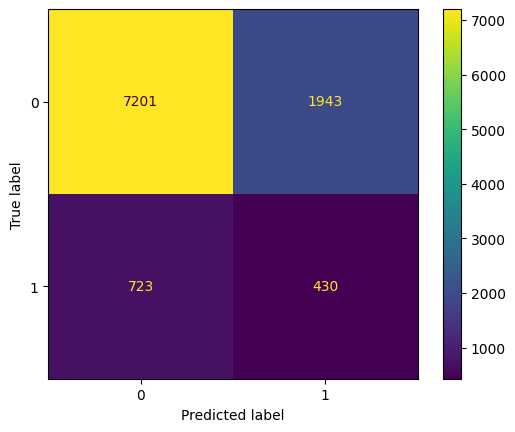

In [47]:
from sklearn import metrics

# Assuming final_model_rf is the best estimator from the GridSearchCV
final_model_rf = grid.best_estimator_

# Predict on the test set. Since X_test is already defined and preprocessed, we use it directly.
y_pred = final_model_rf.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Best parameters:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)
print("Feature importance:", grid.best_estimator_.named_steps['classifier'].feature_importances_)
print("\nAccuracy:", accuracy)

# Generate and display the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)  # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()


## **Persona 2 RF**

In [48]:
from datetime import datetime
print("Start search time:", datetime.now())

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline

# Load and preprocess data
data = pd.read_csv('bank-additional-full.csv', delimiter=';')
data_encoded = pd.get_dummies(data, drop_first=True)

# Select specific predictors
predictors = ['marital_single', 'job_blue-collar', 'education_high.school', 'loan_unknown', 'age', 'housing_unknown']
X = data_encoded[predictors]
y = data_encoded['y_yes']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the parameter grid
param = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth': [4, 6, 8],
    'classifier__criterion': ['gini', 'entropy']
}

# Create a pipeline that first applies SMOTE then fits a RandomForest classifier
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=10))
])

# Using GridSearchCV to find the best parameters
grid = GridSearchCV(estimator=pipeline,
                    param_grid=param,
                    scoring="accuracy",
                    verbose=1, cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)
print("Feature importance:", grid.best_estimator_.named_steps['classifier'].feature_importances_)
print("End search time:", datetime.now())

Start search time: 2024-04-01 19:15:37.467410
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 6, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}
Best estimator: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=6,
                                        random_state=10))])
Feature importance: [0.07211424 0.21364583 0.03445587 0.01062588 0.65881085 0.01034733]
End search time: 2024-04-01 19:16:00.264906


Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 6, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}
Best estimator: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=6,
                                        random_state=10))])
Feature importance: [0.07211424 0.21364583 0.03445587 0.01062588 0.65881085 0.01034733]

Accuracy: 0.7389530931339225


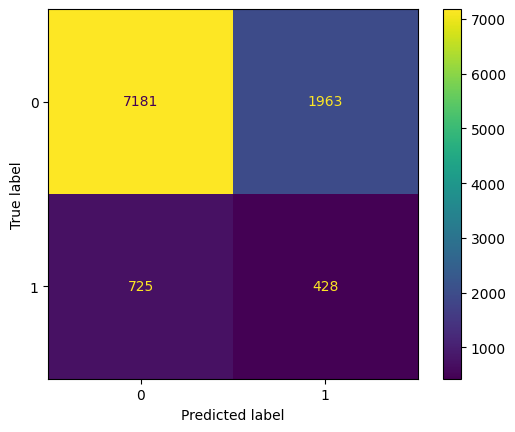

In [49]:
from sklearn import metrics

# Assuming final_model_rf is the best estimator from the GridSearchCV
final_model_rf = grid.best_estimator_

# Predict on the test set. Since X_test is already defined and preprocessed, we use it directly.
y_pred = final_model_rf.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Best parameters:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)
print("Feature importance:", grid.best_estimator_.named_steps['classifier'].feature_importances_)
print("\nAccuracy:", accuracy)

# Generate and display the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)  # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()

## **Persona 1 SVM**

In [51]:
from datetime import datetime
print("Start search time:", datetime.now())

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Load and preprocess data
data = pd.read_csv('bank-additional-full.csv', delimiter=';')  # Update with the correct path
data_encoded = pd.get_dummies(data, drop_first=True)

# Select specific predictors and target
predictors = ['marital_married', 'job_self-employed', 'education_university.degree', 'loan_yes', 'age', 'housing_yes']
X = data_encoded[predictors]
y = data_encoded['y_yes']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# SVM Tuning parameters
param = {
    'classifier__C': [.00001, .0001, .001, 0.01],
    'classifier__gamma': [.00001, .0001, .001, .01],  # 1/n_features
    'classifier__kernel': ['rbf', 'linear']
}

# Create a pipeline that first applies SMOTE then fits an SVM classifier
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(random_state=10))
])

# Using GridSearchCV to find the best parameters
grid = GridSearchCV(estimator=pipeline,
                    param_grid=param,
                    verbose=3, cv=3,
                    n_jobs=-1,
                    refit=True)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)

print("End search time:", datetime.now())


Start search time: 2024-04-01 19:27:51.400248
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters: {'classifier__C': 1e-05, 'classifier__gamma': 0.0001, 'classifier__kernel': 'rbf'}
Best estimator: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier', SVC(C=1e-05, gamma=0.0001, random_state=10))])
End search time: 2024-04-01 19:35:15.817039


Best estimator: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier', SVC(C=1e-05, gamma=0.0001, random_state=10))])

Accuracy: 0.8886083325240361


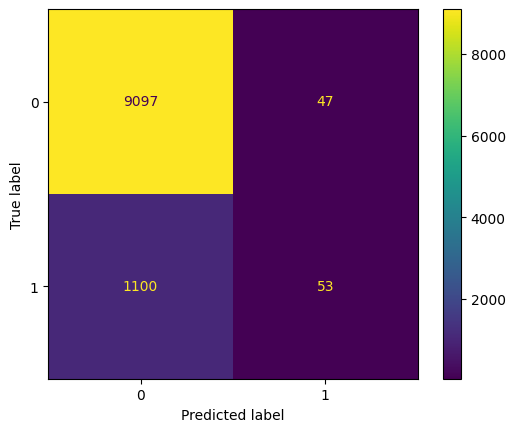

In [52]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming final_model_svm is the best estimator from the GridSearchCV
final_model_svm = grid.best_estimator_

# Adjust the variable names for consistency
y_pred = final_model_svm.predict(X_test)  # Use X_test instead of X_test_JB

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)  # Use y_test instead of y_test_JB
print("Best estimator:", grid.best_estimator_)
print("\nAccuracy:", accuracy)

# Generate and display the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)  # Use y_test instead of y_test_JB
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()  # Display the confusion matrix plot


## **Persona 2 SVM**

In [56]:
from datetime import datetime
print("Start search time:", datetime.now())

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Load and preprocess data
data = pd.read_csv('bank-additional-full.csv', delimiter=';')  # Update with the correct path
data_encoded = pd.get_dummies(data, drop_first=True)

# Select specific predictors and target
predictors = ['marital_single', 'job_blue-collar', 'education_high.school', 'loan_unknown', 'age', 'housing_unknown']
X = data_encoded[predictors]
y = data_encoded['y_yes']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# SVM Tuning parameters
param = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [0.1, 1, 10, 100],  # 1/n_features
    'classifier__kernel': ['rbf', 'linear']
}

# Create a pipeline that first applies SMOTE then fits an SVM classifier
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(random_state=10))
])

# Using GridSearchCV to find the best parameters
grid = GridSearchCV(estimator=pipeline,
                    param_grid=param,
                    verbose=3, cv=3,
                    n_jobs=-1,
                    refit=True)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)

print("End search time:", datetime.now())


Start search time: 2024-04-01 19:57:23.077103
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters: {'classifier__C': 0.1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
Best estimator: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier', SVC(C=0.1, gamma=0.1, random_state=10))])
End search time: 2024-04-01 20:27:24.411900


Best estimator: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier', SVC(C=0.1, gamma=0.1, random_state=10))])

Accuracy: 0.7174905312226862


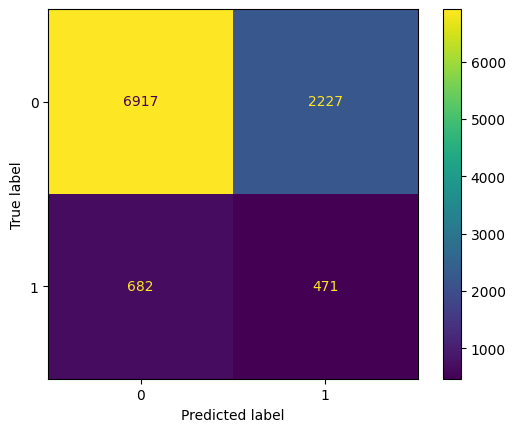

In [57]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming final_model_svm is the best estimator from the GridSearchCV
final_model_svm = grid.best_estimator_

# Adjust the variable names for consistency
y_pred = final_model_svm.predict(X_test)  # Use X_test instead of X_test_JB

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)  # Use y_test instead of y_test_JB
print("Best estimator:", grid.best_estimator_)
print("\nAccuracy:", accuracy)

# Generate and display the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)  # Use y_test instead of y_test_JB
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()  # Display the confusion matrix plot